<a href="https://colab.research.google.com/github/Riswanpk/OIBSIP/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 02 : Unemployment Analysis with Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Step 1 : Import The Dataset

In [3]:
data=pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
data

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [4]:
data.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


Step 2 : Removing Outliers using IQR Method

In [5]:
q1=data[' Estimated Unemployment Rate'].quantile(0.25)
q3=data[' Estimated Unemployment Rate'].quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
data=data[(data[' Estimated Unemployment Rate']>=lower_bound) & (data[' Estimated Unemployment Rate']<=upper_bound)]

Step 3 : Check for missing values

In [ ]:
print(data.isnull().sum())

States                                  0
 Date                                   0
 Frequency                              0
 Estimated Unemployment Rate            0
 Estimated Employed                     0
 Estimated Labour Participation Rate    0
Region                                  0
longitude                               0
latitude                                0
dtype: int64


Step 4 : Plotting Correlation Heatmap

<ipython-input-6-6114fb87c34d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)


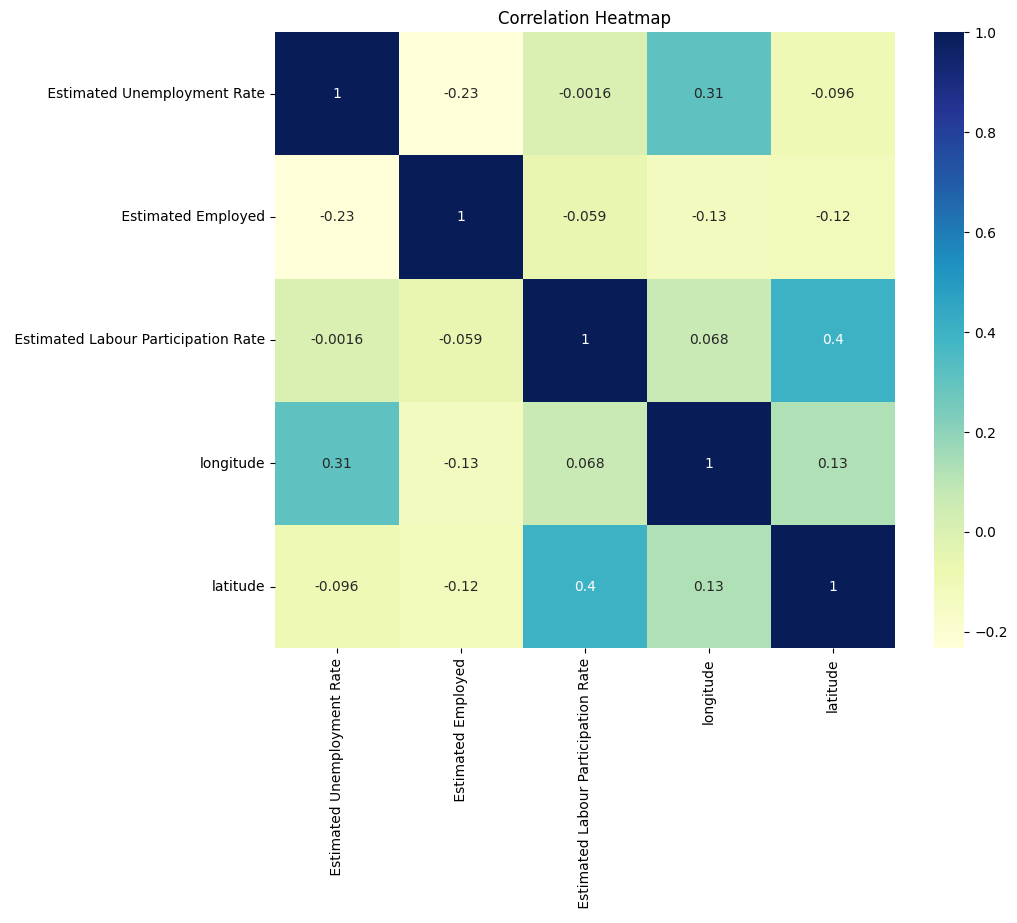

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True)
plt.title("Correlation Heatmap")
plt.show()

Step 5 : Distribution Of Estimated Unemployment Rate

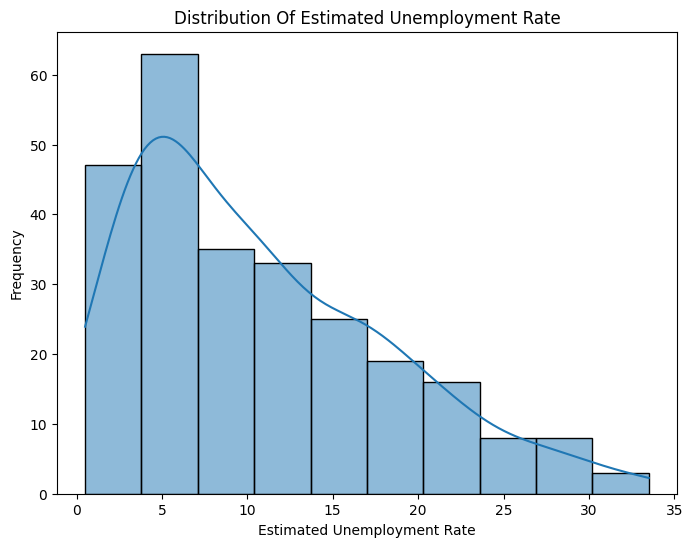

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x=" Estimated Unemployment Rate",kde=True)
plt.title("Distribution Of Estimated Unemployment Rate")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Frequency")
plt.show()

Step 6 : Plotting Histogram of Estimated Employed by Region

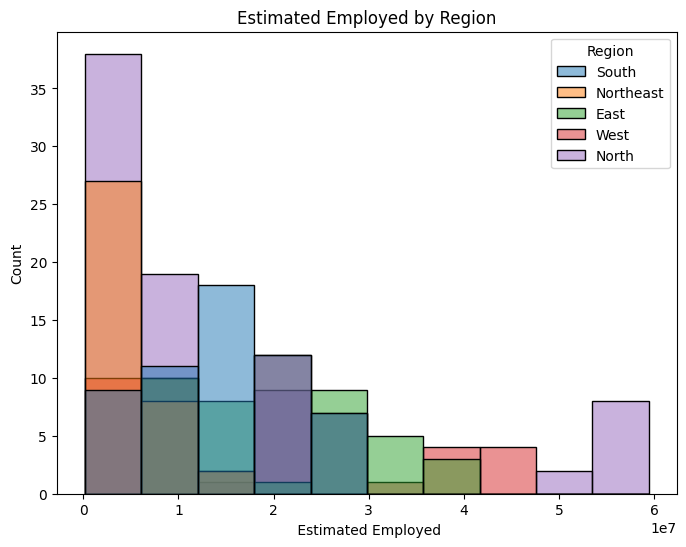

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x=' Estimated Employed',hue='Region')
plt.title("Estimated Employed by Region")
plt.show()


Step 7 : Creating Sunburst Chart of Unemployment Rate in India

In [25]:
unemployment=data[['States','Region',' Estimated Unemployment Rate']]
fig=px.sunburst(unemployment,path=['Region','States'],values=' Estimated Unemployment Rate',
                color_continuous_scale='YlGnBu',title='Unemployment Rate in India')
fig.update_layout(width=700,height=700)
fig.show()

Step 8 : Line plot of Unemployment Rate over time

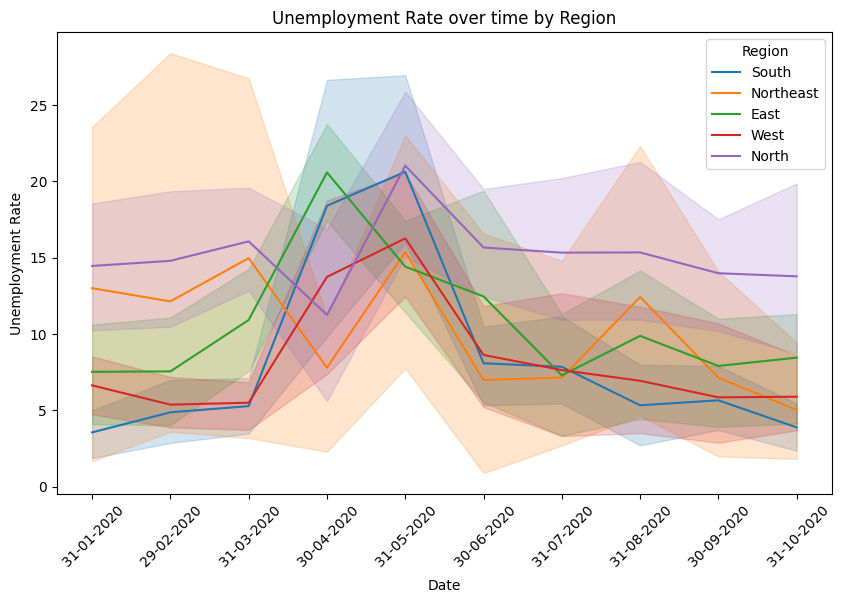

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x=' Date',y=' Estimated Unemployment Rate',hue='Region')
plt.title('Unemployment Rate over time by Region')
plt.xlabel('Date')
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.show()

Step 9 : Box plot of Unemployment Rate by Region

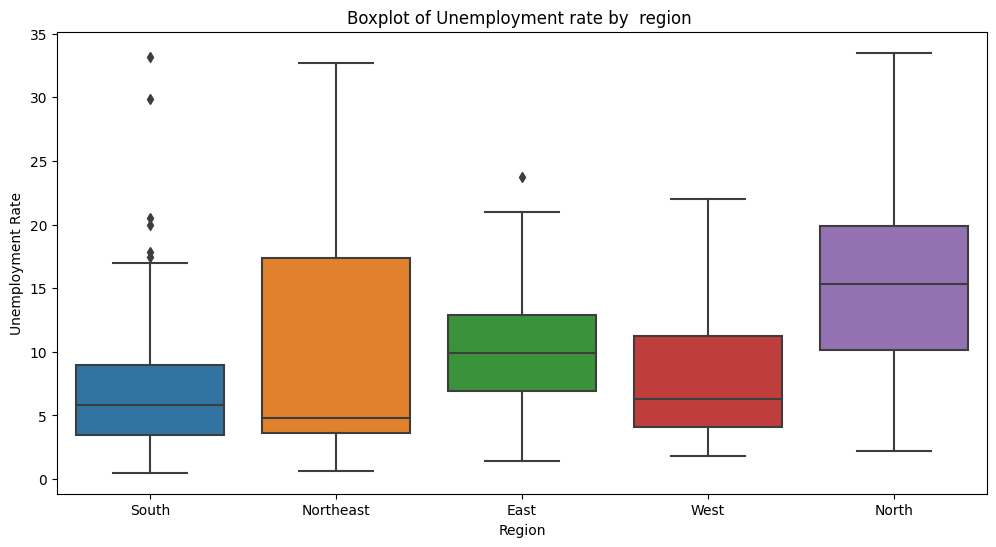

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data,x='Region',y=' Estimated Unemployment Rate')
plt.title('Boxplot of Unemployment rate by  region ')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.show()

Step 10 : Scatter plot of Unemployment Rate Vs Estimated Employed

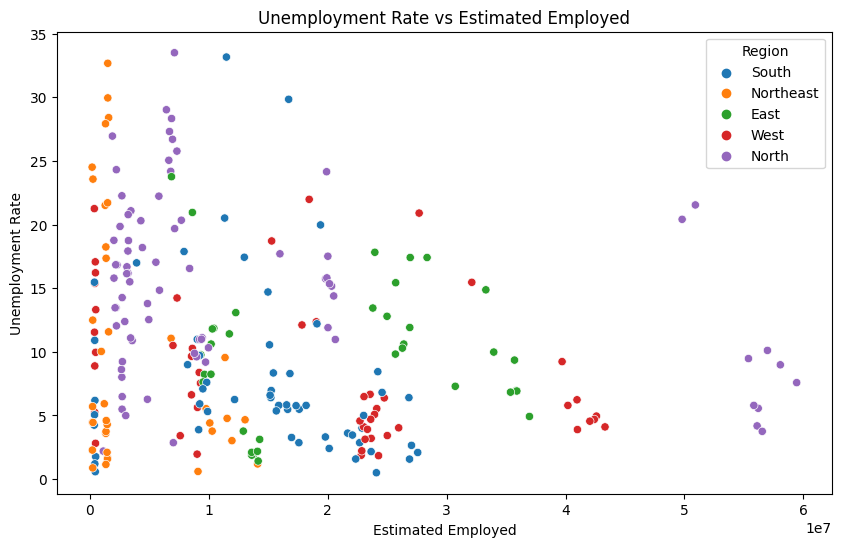

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x=' Estimated Employed',y=' Estimated Unemployment Rate',hue='Region')
plt.title('Unemployment Rate vs Estimated Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Unemployment Rate')
plt.show()

Step 11 : Bar plot of the average Unemployment Rate by Region

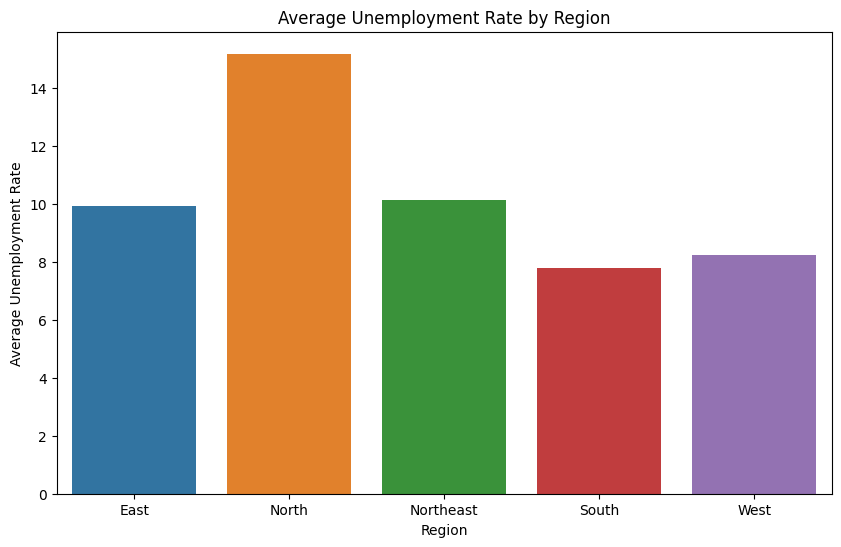

In [13]:
avg_unemployment=data.groupby('Region')[' Estimated Unemployment Rate'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=avg_unemployment,x='Region',y=' Estimated Unemployment Rate')
plt.title("Average Unemployment Rate by Region")
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.show()

Step 12 : Piechart for Unemployment Rate Distribution by Region

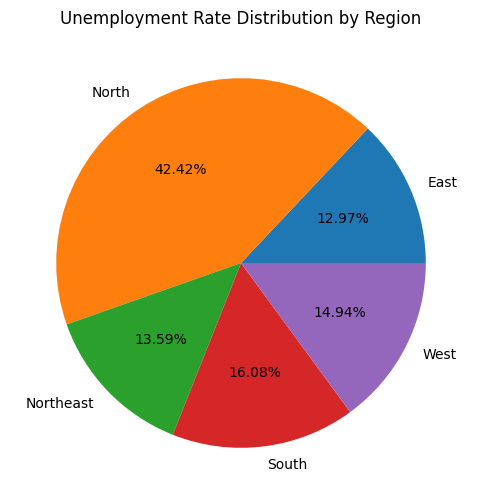

In [24]:
region_unemployment=data.groupby('Region')[' Estimated Unemployment Rate'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.pie(region_unemployment[' Estimated Unemployment Rate'],labels=region_unemployment['Region'],autopct='%1.2f%%')
plt.title("Unemployment Rate Distribution by Region")
plt.show()